<a href="https://colab.research.google.com/github/preet-pdf/MLA_FILES/blob/main/Practical_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
%cd '/content/drive/My Drive/Assignment2'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/My Drive/Assignment2


In [ ]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

Q: How many total observations in data?

In [ ]:
df = pd.read_csv("CarPrice_Assignment.csv")
df.head()


,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [ ]:
print(df.shape)

(205, 26)


**Q**. Why you want to apply regression on selected dataset? Discuss full story behind dataset.
<br>

*Answer: to get best fit line from given dataset for better predictions we need to use multiple linear regression for this dataset.*

Q: How many independent variables?

Answer:total - 6

Q: Which is dependent variable?

Answer:total - 1

*Q: Which are most useful variable in estimation? Prove using correlation.*

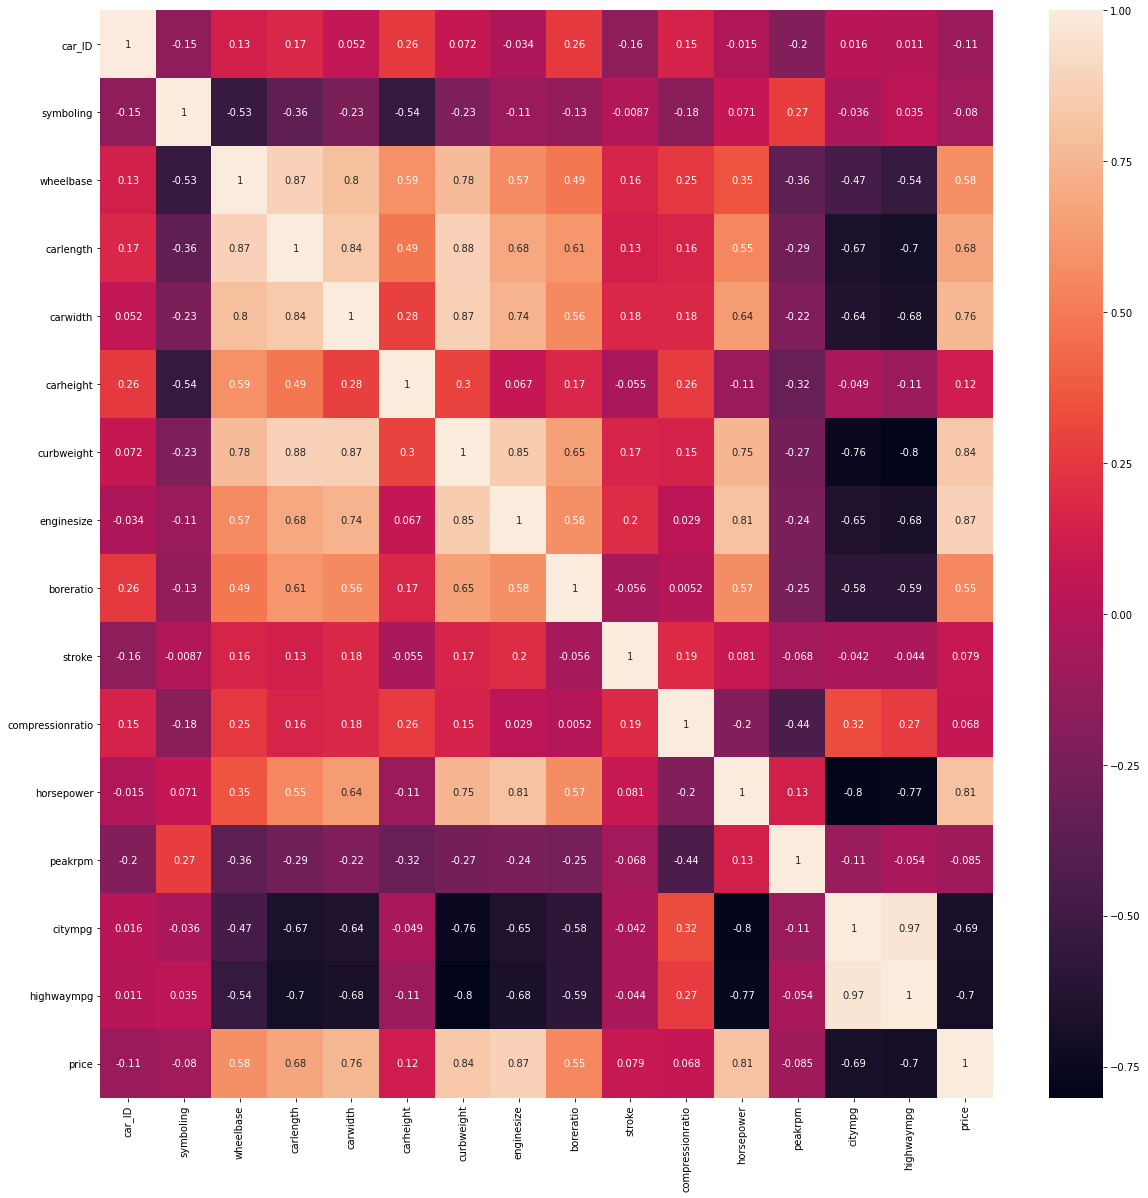

In [ ]:
import seaborn as sns
correlation = df.corr()
plt.figure(figsize = (20,20))
sns.heatmap(correlation,annot=True)

In [ ]:
df = df[["cylindernumber", "enginesize", "horsepower", "citympg", "highwaympg", "price"]]

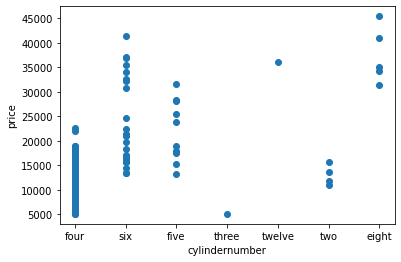

In [ ]:
plt.scatter(df["cylindernumber"],df["price"])
plt.xlabel("cylindernumber")
plt.ylabel("price")
plt.show()

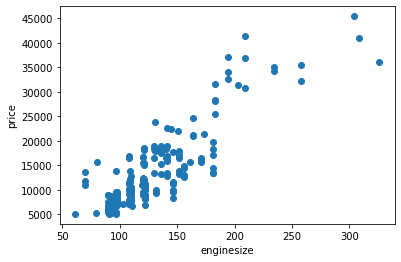

In [ ]:
plt.scatter(df["enginesize"],df["price"])
plt.xlabel("enginesize")
plt.ylabel("price")
plt.show()

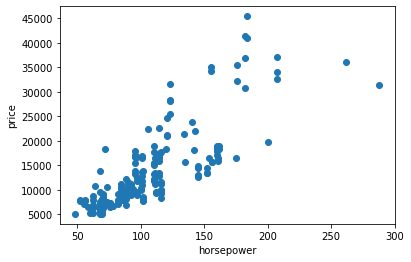

In [ ]:
plt.scatter(df["horsepower"],df["price"])
plt.xlabel("horsepower")
plt.ylabel("price")
plt.show()

In [ ]:
df["cylindernumber"] = df["cylindernumber"].replace(['two'],2)
df["cylindernumber"] = df["cylindernumber"].replace(['three'],3)
df["cylindernumber"] = df["cylindernumber"].replace(['four'],4)
df["cylindernumber"] = df["cylindernumber"].replace(['five'],5)
df["cylindernumber"] = df["cylindernumber"].replace(['six'],6)
df["cylindernumber"] = df["cylindernumber"].replace(['eight'],8)
df["cylindernumber"] = df["cylindernumber"].replace(['twelve'],12)

In [ ]:
X = np.array(df[["cylindernumber", "enginesize", "horsepower", "citympg", "highwaympg"]])
y = np.array(df["price"])
y = y.reshape(len(y), 1)
X.shape, y.shape

((205, 5), (205, 1))

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [ ]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True)

LRmodel = LinearRegression(normalize=True, copy_X=True)
TRmodel = LRmodel.fit(X_train, y_train)

In [ ]:
print(TRmodel.coef_)


[[-669.03035007  134.42395083   41.25237702   24.71079399 -134.20123291]]


In [ ]:
prediction = LRmodel.predict(X_test)
scoremodel = LRmodel.score(X_test, y_test)
print(f"the score of our model is {scoremodel}")

the score of our model is 0.7098994839802096


In [ ]:
from sklearn.metrics import r2_score

Q: Quantify goodness of your model and discuss steps taken for improvement (RMSE, SSE, R2Score)

In [ ]:
r2_score(y_test,prediction)

0.7098994839802096

In [ ]:
from sklearn.metrics import mean_squared_error
import math

In [ ]:
rmse = mean_squared_error(y_test,prediction, squared=False)
math.sqrt(rmse)

66.41605185253447